In [18]:
import pandas as pd
import numpy as np

data = {
    'ProductID': ['P101', 'P102', 'P103', 'P101', 'P104', 'P102', 'P105', 'P103', 'P101', 'P106',
                  'P107', 'P101', 'P102', 'P104', 'P105', 'P103', 'P106', 'P107', 'P101', 'P102'],
    'Customer_ID': ['C001', 'C002', 'C003', 'C001', 'C004', 'C002', 'C005', 'C003', 'C006', 'C007',
                    'C008', 'C001', 'C002', 'C004', 'C005', 'C003', 'C007', 'C008', 'C006', 'C002'],
    'Order_Date': ['2023-01-05', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                   '2023-02-10', '2023-02-11', '2023-02-12', '2023-03-15', '2023-03-16',
                   '2023-04-20', '2023-04-21', '2023-05-01', '2023-05-02', '2023-06-05',
                   '2023-06-06', "NaN", '2023-07-11', '2023-08-15', '2023-08-16'],
    'Quantity': [2, 1, 3, 1, 2, 4, 1, 2, 3, 0,
                 2, 1, 3, 2, 1, 2, 1, 3, 2, np.NaN],
    'Unit_Price': [0, 50.00, 15.00, 25.00, 100.00, 50.00, 75.00, 15.00, 25.00, 30.00,
                   60.00, 25.00, 50.00, 100.00, 75.00, 15.00, 30.00, 60.00, 25.00, np.NaN],
    'Category': ['Electronics', 'Books', 'Home & Kitchen', 'Electronics', 'Apparel',
                 'Books', 'Electronics', 'Home & Kitchen', 'Electronics', 'Books',
                 'Apparel', 'Electronics', 'Books', 'Apparel', 'Electronics',
                 'Home & Kitchen', 'Books', 'Apparel', 'Electronics', 'Books'],
    'Region': ['East', 'West', 'North', 'East', 'South',
               'West', 'North', 'East', 'South', 'West',
               'North', 'East', 'West', 'South', 'North',
               'East', 'South', 'West', 'North', 'East']
}


df1 = pd.DataFrame(data, index=data['ProductID'])
df1 = df1.drop(columns="ProductID")
df1 = df1.dropna()
print(df1)

df1.to_excel("df1.xlsx")


     Customer_ID  Order_Date  Quantity  Unit_Price        Category Region
P101        C001  2023-01-05       2.0         0.0     Electronics   East
P102        C002  2023-01-05       1.0        50.0           Books   West
P103        C003  2023-01-06       3.0        15.0  Home & Kitchen  North
P101        C001  2023-01-07       1.0        25.0     Electronics   East
P104        C004  2023-01-08       2.0       100.0         Apparel  South
P102        C002  2023-02-10       4.0        50.0           Books   West
P105        C005  2023-02-11       1.0        75.0     Electronics  North
P103        C003  2023-02-12       2.0        15.0  Home & Kitchen   East
P101        C006  2023-03-15       3.0        25.0     Electronics  South
P106        C007  2023-03-16       0.0        30.0           Books   West
P107        C008  2023-04-20       2.0        60.0         Apparel  North
P101        C001  2023-04-21       1.0        25.0     Electronics   East
P102        C002  2023-05-01       3.0

In [28]:
df4 = pd.read_excel("df1.xlsx", index_col=0) # Making first column as idnex
print(df4) 
df5 = df4.dropna()
for row in df5:
    print(row)

     Customer_ID  Order_Date  Quantity  Unit_Price        Category Region
P101        C001         NaN       NaN         NaN             NaN    NaN
P102        C002  2023-01-05       1.0        50.0           Books   West
P103        C003  2023-01-06       3.0        15.0  Home & Kitchen  North
P101        C001  2023-01-07       1.0        25.0     Electronics   East
P104        C004  2023-01-08       2.0       100.0         Apparel  South
P102        C002  2023-02-10       4.0        50.0           Books   West
P105        C005  2023-02-11       1.0        75.0     Electronics  North
P103        C003  2023-02-12       2.0        15.0  Home & Kitchen   East
P101        C006  2023-03-15       3.0        25.0     Electronics  South
P106        C007  2023-03-16       0.0        30.0           Books   West
P107        C008  2023-04-20       2.0        60.0         Apparel  North
P101        C001  2023-04-21       1.0        25.0     Electronics   East
P102        C002  2023-05-01       3.0

In [47]:
df6 = df5.groupby("Customer_ID")[["Quantity","Unit_Price"]].sum().sort_values(by=["Unit_Price"]).reset_index()
print(df6)

  Customer_ID  Quantity  Unit_Price
0        C007       0.0        30.0
1        C003       7.0        45.0
2        C001       2.0        50.0
3        C006       5.0        50.0
4        C008       5.0       120.0
5        C002       8.0       150.0
6        C005       2.0       150.0
7        C004       4.0       200.0


<Axes: xlabel='Customer_ID', ylabel='Quantity'>

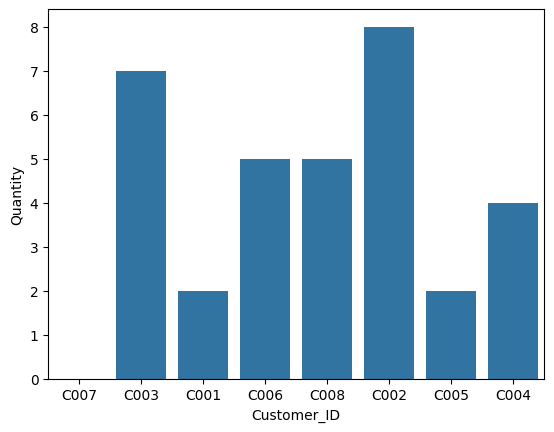

In [51]:
import seaborn as sns
sns.barplot(x="Customer_ID", y="Quantity", data=df6)

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(df6["Quantity"], labels=df6["Customer_ID"] ,startangle=90)

KeyError: 'Customer_ID'

             Quantity  Unit_Price
Customer_ID                      
1                  50         100
2                  30         150
3                  70          80


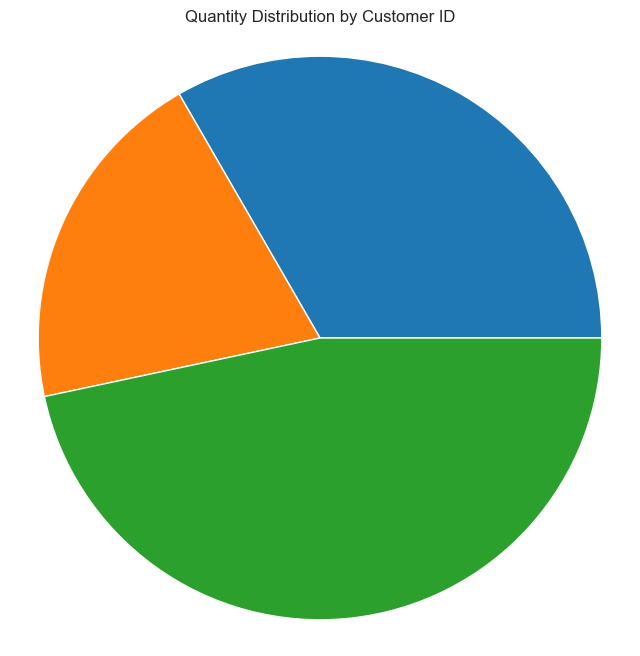

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample df6 (replace with your actual df6)
data = {'Customer_ID': [1, 2, 3], 'Quantity': [50, 30, 70], 'Unit_Price': [100, 150, 80]}
df6 = pd.DataFrame(data).set_index('Customer_ID')
print(df6)


# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(df6['Quantity'])
plt.title('Quantity Distribution by Customer ID')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [69]:
df = sns.load_dataset("titanic")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


(891, 15)

In [70]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

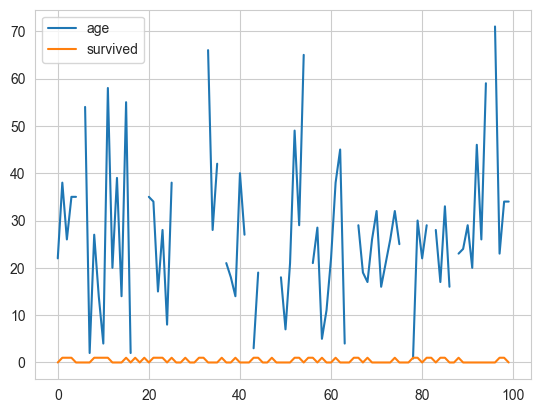

In [76]:
df[["age","survived"]][:100].plot()

<Axes: xlabel='sex', ylabel='count'>

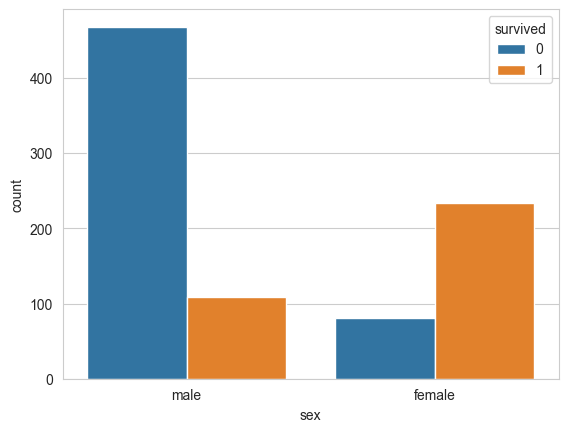

In [78]:
sns.countplot(df, x='sex', hue="survived")

In [79]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [83]:
df2 = df["survived"].mean()
print("%.2f"%(df2*100))

38.38


In [87]:
# pclass wise
df3 = df.groupby("pclass")[["survived"]].mean().reset_index()
print(df3)

df4 = df.groupby("sex")[["survived"]].mean().reset_index()
print(df4)

   pclass  survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      sex  survived
0  female  0.742038
1    male  0.188908


In [92]:
df4 = df.groupby(["sex","pclass"])[["survived"]].mean().reset_index()
df4["Suvived rate"] = df4["survived"]*100
print(df4)

      sex  pclass  survived  Suvived rate
0  female       1  0.968085     96.808511
1  female       2  0.921053     92.105263
2  female       3  0.500000     50.000000
3    male       1  0.368852     36.885246
4    male       2  0.157407     15.740741
5    male       3  0.135447     13.544669


      sex  pclass  survived  Survived rate
0  female       1  0.968085      96.808511
1  female       2  0.921053      92.105263
2  female       3  0.500000      50.000000
3    male       1  0.368852      36.885246
4    male       2  0.157407      15.740741
5    male       3  0.135447      13.544669


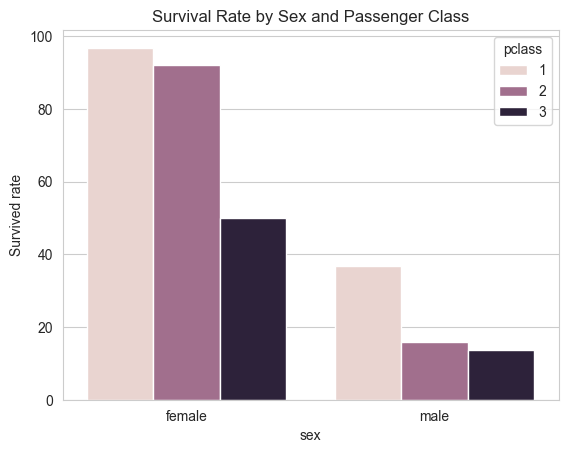

In [99]:
df4 = df.groupby(["sex","pclass"])[["survived"]].mean().reset_index()
df4["Survived rate"] = df4["survived"]*100
print(df4)



sns.barplot(data = df4, x="sex", y="Survived rate", hue='pclass')
plt.title('Survival Rate by Sex and Passenger Class')
plt.show()

In [113]:
import pandas as pd
# Sample df6 (replace with your actual df6)
data1 = {'Customer_ID': [1, 2, 3], 'Quantity': [50, 30, 70], 'Unit_Price': [100, 150, 80]}
df1 = pd.DataFrame(data1)
# Sample df6 (replace with your actual df6)
data2 = {'Customer_ID': [4, 5, 6], 'Quantity': [50, 30, 70], 'Unit_Price': [100, 150, 80]}
df2 = pd.DataFrame(data2)


df = pd.concat([df1,df2]).reset_index()
df = df.drop(columns=["index"])
print(df)


   Customer_ID  Quantity  Unit_Price
0            1        50         100
1            2        30         150
2            3        70          80
3            4        50         100
4            5        30         150
5            6        70          80


In [114]:
df = pd.concat([df1,df2], axis=1).reset_index()
df = df.drop(columns=["index"])
print(df)

   Customer_ID  Quantity  Unit_Price  Customer_ID  Quantity  Unit_Price
0            1        50         100            4        50         100
1            2        30         150            5        30         150
2            3        70          80            6        70          80


In [122]:
import pandas as pd
# Sample df6 (replace with your actual df6)
data1 = {'Customer_ID': [1, 2, 3], 'Quantity': [50, 30, 70], 'Unit_Price': [100, 150, 80]}
df1 = pd.DataFrame(data1)
# Sample df6 (replace with your actual df6)
data2 = {'Customer_ID': [4, 5, 6], 'Quantity': [1, 2, 3], 'Unit_Price': [100, 150, 80]}
df2 = pd.DataFrame(data2)
print(df1)
print(df2)
result = df1.join(df2)
print(result)

   Customer_ID  Quantity  Unit_Price
0            1        50         100
1            2        30         150
2            3        70          80
   Customer_ID  Quantity  Unit_Price
0            4         1         100
1            5         2         150
2            6         3          80


ValueError: columns overlap but no suffix specified: Index(['Customer_ID', 'Quantity', 'Unit_Price'], dtype='object')

In [120]:
import pandas as pd

# Sample df1
data1 = {'Customer_ID': [1, 2, 3], 'Quantity': [50, 30, 70], 'Unit_Price': [100, 150, 80]}
df1 = pd.DataFrame(data1)

# Sample df2
data2 = {'Customer_ID': [4, 5, 6], 'Quantity': [50, 30, 70], 'Unit_Price': [100, 150, 80]}
df2 = pd.DataFrame(data2)

# Perform the join and store the result
joined_df = df1.join(df2, lsuffix='_df1', rsuffix='_df2') # Using suffixes for clarity

print("Result of df1.join(df2):")
print(joined_df)

Result of df1.join(df2):
   Customer_ID_df1  Quantity_df1  Unit_Price_df1  Customer_ID_df2  \
0                1            50             100                4   
1                2            30             150                5   
2                3            70              80                6   

   Quantity_df2  Unit_Price_df2  
0            50             100  
1            30             150  
2            70              80  
